In [68]:
import pandas as pd
import numpy as np

## Loading the data

In [69]:
df = pd.read_csv('data.csv', index_col='Unnamed: 0') #'Unnamed: 0' is an ID column for data lines
                                                     #It contains unique index for each line. 
print(df.shape)
df.head()

(16643, 88)


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Data analysis

Let's analyze the data first by looking at columns and its elements:

In [70]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

Column `Unnamed: 0` which we put as a column of row indices has a unique number for each row in the data frame, so we can drop the internal Fifa player id (column `ID`) for our purposes.

We also need to remove all links and other information that hasn't meaningful information about the football player.

In [71]:
df = df.drop(['ID', 'Name', 'Photo', 'Flag', 'Club Logo'], axis = 1)

Carefull look at the dataframe will show that `'Loaned From'` column has all values equal to `NaN`.

In [72]:
if df['Loaned From'].isna().sum() == df.shape[0]:
    print('all NaNs here')
else:
    print('no NaNs here')

all NaNs here


So we can drop the column without any information at all:

In [73]:
df = df.drop('Loaned From', axis = 1)

Now lets check the columns of the dataframe:

There are some different data types in the dataframe: Date columns, cathegorical columns and numbers. To find out what data type contains each column we should look at the elements of each column:

In [74]:
for i in df.columns:
    print(i+':',df[i][0])

Age: 31
Nationality: Argentina
Overall: 94
Potential: 94
Club: FC Barcelona
Value: €110.5M
Wage: €565K
Special: 2202
Preferred Foot: Left
International Reputation: 5.0
Weak Foot: 4.0
Skill Moves: 4.0
Work Rate: Medium/ Medium
Body Type: Messi
Real Face: Yes
Position: RF
Jersey Number: 10.0
Joined: Jul 1, 2004
Contract Valid Until: 2021
Height: 5'7
Weight: 159lbs
LS: 88+2
ST: 88+2
RS: 88+2
LW: 92+2
LF: 93+2
CF: 93+2
RF: 93+2
RW: 92+2
LAM: 93+2
CAM: 93+2
RAM: 93+2
LM: 91+2
LCM: 84+2
CM: 84+2
RCM: 84+2
RM: 91+2
LWB: 64+2
LDM: 61+2
CDM: 61+2
RDM: 61+2
RWB: 64+2
LB: 59+2
LCB: 47+2
CB: 47+2
RCB: 47+2
RB: 59+2
Crossing: 84.0
Finishing: 95.0
HeadingAccuracy: 70.0
ShortPassing: 90.0
Volleys: 86.0
Dribbling: 97.0
Curve: 93.0
FKAccuracy: 94.0
LongPassing: 87.0
BallControl: 96.0
Acceleration: 91.0
SprintSpeed: 86.0
Agility: 91.0
Reactions: 95.0
Balance: 95.0
ShotPower: 85.0
Jumping: 68.0
Stamina: 72.0
Strength: 59.0
LongShots: 94.0
Aggression: 48.0
Interceptions: 22.0
Positioning: 94.0
Vision: 94.

## Columns description

1. `Value`, `Wage` and `Release Clause` columns contains the amount of money (**M** means millions and **K** means thousands).
2. `Height`, `Weight`, `LS`, `ST`, `RS`, `LW`, `LF`, `CF`, `RF`, `RW`, `LAM`, `CAM`, `RAM`, `LM`, `LCM`, `CM`, `RCM`, `RM`, `LWB`, `LDM`, `CDM`, `RDM`, `RWB`, `LB`, `LCB`, `CB`, `RCB`, `RB` columns contain strings that needs to be converted into integers.
3. `Joined` column contains the date
4. `Nationality`, `Club`,  `Preferred Foot`, `Work Rate`, `Body Type`, `Real Face`, `Position` are columns with some cathegorical data.
5. The rest of the columns contain ordinary numbers that do not need to be edited in any way. 

The point is that the models that we will train on our data can only work with numbers. In this case, we need to figure out how to convert all non-numeric information to numeric.

## Data preprocessing

First, let's convert the money into numbers.

In [75]:
#Solution
def price2int(price):
    number = price[1:-1]
    letter = price[-1]
    new_price = (float(number) if number!='' else 0, letter)
    
    if new_price[-1] == 'M':
        return new_price[0]*(10**6)
    elif new_price[-1] == 'K':
        return new_price[0]*(10**3)
    else:
        return 0

In [76]:
#Remembering the number of lines in the dataset
dataset_length = df.shape[0]
#Creating np.arrays that we will process and put into dataframe
value_col = df['Value'].values
wage_col = df['Wage'].values
release_col = df['Release Clause'].values
#Processing values
for i in range(dataset_length):
    value_col[i] = price2int(value_col[i])
    wage_col[i] = price2int(wage_col[i])
    release_col[i] = price2int(release_col[i])
#putting precessed np.arrays into dataframe
df['new Value'] = value_col
df['new Wage'] = wage_col
df['new Release Clause'] = release_col
#Deleting old columns
df = df.drop(['Value', 'Wage', 'Release Clause'], axis = 1)

df

,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,new Value,new Wage,new Release Clause
0,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,4.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,1.105e+08,565000,2.265e+08
1,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,5.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,7.7e+07,405000,1.271e+08
2,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,1.185e+08,290000,2.281e+08
3,27,Spain,91,93,Manchester United,1471,Right,4.0,3.0,1.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,7.2e+07,260000,1.386e+08
4,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,4.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,1.02e+08,355000,1.964e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,19,England,47,65,Crewe Alexandra,1307,Right,1.0,2.0,2.0,...,48.0,47.0,10.0,13.0,7.0,8.0,9.0,60000,1000,143000
16639,19,Sweden,47,63,Trelleborgs FF,1098,Right,1.0,2.0,2.0,...,15.0,19.0,10.0,9.0,9.0,5.0,12.0,60000,1000,113000
16640,16,England,47,67,Cambridge United,1189,Right,1.0,3.0,2.0,...,13.0,11.0,6.0,5.0,10.0,6.0,13.0,60000,1000,165000
16641,17,England,47,66,Tranmere Rovers,1228,Right,1.0,3.0,2.0,...,25.0,27.0,14.0,6.0,14.0,8.0,9.0,60000,1000,143000


### Weight preprocessing

In [77]:
weight_col = df['Weight'].values
for i in range(dataset_length):
    weight_col[i] = float(weight_col[i][:3])
    
df['new Weight'] = weight_col
df = df.drop(['Weight'], axis = 1)

In [78]:
df

,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,new Value,new Wage,new Release Clause,new Weight
0,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,4.0,...,26.0,6.0,11.0,15.0,14.0,8.0,1.105e+08,565000,2.265e+08,159
1,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,5.0,...,23.0,7.0,11.0,15.0,14.0,11.0,7.7e+07,405000,1.271e+08,183
2,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,5.0,...,33.0,9.0,9.0,15.0,15.0,11.0,1.185e+08,290000,2.281e+08,150
3,27,Spain,91,93,Manchester United,1471,Right,4.0,3.0,1.0,...,13.0,90.0,85.0,87.0,88.0,94.0,7.2e+07,260000,1.386e+08,168
4,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,4.0,...,51.0,15.0,13.0,5.0,10.0,13.0,1.02e+08,355000,1.964e+08,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,19,England,47,65,Crewe Alexandra,1307,Right,1.0,2.0,2.0,...,47.0,10.0,13.0,7.0,8.0,9.0,60000,1000,143000,134
16639,19,Sweden,47,63,Trelleborgs FF,1098,Right,1.0,2.0,2.0,...,19.0,10.0,9.0,9.0,5.0,12.0,60000,1000,113000,170
16640,16,England,47,67,Cambridge United,1189,Right,1.0,3.0,2.0,...,11.0,6.0,5.0,10.0,6.0,13.0,60000,1000,165000,148
16641,17,England,47,66,Tranmere Rovers,1228,Right,1.0,3.0,2.0,...,27.0,14.0,6.0,14.0,8.0,9.0,60000,1000,143000,154


## Splitting strings into 2 integers

There are columns in the dataframe, the values of which are strings that can be split into 2 integers by a special character. All such columns are indicated in paragraph 2 of Columns description part.

In [79]:
def split_df_update(df, column, split_sign):
    """
    input: dataframe, name of column that should be processed, split sign.
    output: dataframe df that has 2 new columns with names column_1 and column_2 and values 
    before split_sign in column_1 and after split_sign in column_2 (nan should be replaced with 0). 
    column is removed from the dataframe after adding column_1 and column_2.
    """
    #Creating np.arrays
    height_col_1 = np.array(df[column].values)
    height_col_2 = np.array(df[column].values)
    #Filling nan values with zeros
    for i in range(dataset_length):
        if str(height_col_1[i]) == 'nan':
            height_col_1[i] = 0.
            height_col_2[i] = 0.
        else:
            #splitting by split_sign
            height_col_val = height_col_1[i].split(split_sign)
            #casting to float and adding values before and after split_sign to the corresponding columns
            height_col_1[i] = float(height_col_val[0])
            height_col_2[i] = float(height_col_val[1])
    #Adding column_1 and column_2 to the dataframe df
    df[column+'_1']=height_col_1
    df[column+'_2']=height_col_2
    #Dropping the column
    df = df.drop([column], axis = 1)
    return df

Here we apply the `split_df_update()` function to the values of the columns specified in the `names` tuple.

In [80]:
names = ('LS','ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB')

for column in names:
    df = split_df_update(df, column, '+')

In [81]:
df = split_df_update(df, 'Height', "'")

Now look at preprocessed `Height` column that became 2 columns: `Height_1` and `Height_2`.

In [82]:
df

,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,LCB_1,LCB_2,CB_1,CB_2,RCB_1,RCB_2,RB_1,RB_2,Height_1,Height_2
0,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,4.0,...,47,2,47,2,47,2,59,2,5,7
1,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,5.0,...,53,3,53,3,53,3,61,3,6,2
2,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,5.0,...,47,3,47,3,47,3,60,3,5,9
3,27,Spain,91,93,Manchester United,1471,Right,4.0,3.0,1.0,...,0,0,0,0,0,0,0,0,6,4
4,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,4.0,...,66,3,66,3,66,3,73,3,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,19,England,47,65,Crewe Alexandra,1307,Right,1.0,2.0,2.0,...,45,2,45,2,45,2,45,2,5,9
16639,19,Sweden,47,63,Trelleborgs FF,1098,Right,1.0,2.0,2.0,...,32,2,32,2,32,2,29,2,6,3
16640,16,England,47,67,Cambridge United,1189,Right,1.0,3.0,2.0,...,28,2,28,2,28,2,33,2,5,8
16641,17,England,47,66,Tranmere Rovers,1228,Right,1.0,3.0,2.0,...,31,2,31,2,31,2,35,2,5,10


## Date preprocessing

The `Joined` column contains **the date**:

In [83]:
df['Joined']

0         Jul 1, 2004
1        Jul 10, 2018
2         Aug 3, 2017
3         Jul 1, 2011
4        Aug 30, 2015
             ...     
16638     May 3, 2017
16639    Mar 19, 2018
16640     Jul 1, 2017
16641    Apr 24, 2018
16642    Oct 30, 2018
Name: Joined, Length: 16643, dtype: object

In [84]:
from datetime import datetime
#Creating 3 arrays for month, day, year
join_month = np.zeros(dataset_length)
join_day   = np.zeros(dataset_length)
join_year  = np.zeros(dataset_length)
#Creating datetime object, changing its format, casting to string, 
#splitting it into 3 parts and cast each to integer.
for i in range(dataset_length):
    date_time_str=df['Joined'].values[i]
    date_time_obj = datetime.strptime(date_time_str, '%b %d, %Y')
    date = date_time_obj.strftime("%m %d %y").split()
    join_month[i] = int(date[0])
    join_day[i]   = int(date[1])
    join_year[i]  = int(date[2])
#Add new columns
df['Joined_month'] = join_month
df['Joined_day']   = join_day
df['Joined_year']  = join_year
#Drop Joined column
df = df.drop(['Joined'], axis = 1)

In [85]:
df

,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,CB_2,RCB_1,RCB_2,RB_1,RB_2,Height_1,Height_2,Joined_month,Joined_day,Joined_year
0,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,4.0,...,2,47,2,59,2,5,7,7.0,1.0,4.0
1,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,5.0,...,3,53,3,61,3,6,2,7.0,10.0,18.0
2,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,5.0,...,3,47,3,60,3,5,9,8.0,3.0,17.0
3,27,Spain,91,93,Manchester United,1471,Right,4.0,3.0,1.0,...,0,0,0,0,0,6,4,7.0,1.0,11.0
4,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,4.0,...,3,66,3,73,3,5,11,8.0,30.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,19,England,47,65,Crewe Alexandra,1307,Right,1.0,2.0,2.0,...,2,45,2,45,2,5,9,5.0,3.0,17.0
16639,19,Sweden,47,63,Trelleborgs FF,1098,Right,1.0,2.0,2.0,...,2,32,2,29,2,6,3,3.0,19.0,18.0
16640,16,England,47,67,Cambridge United,1189,Right,1.0,3.0,2.0,...,2,28,2,33,2,5,8,7.0,1.0,17.0
16641,17,England,47,66,Tranmere Rovers,1228,Right,1.0,3.0,2.0,...,2,31,2,35,2,5,10,4.0,24.0,18.0


## Processing cathegorical data

Now we will use one-hot encoding to represent cathegorical data with integers. To encode 

In [86]:
%%time
#Creating tuple of names of cathegories data columns
cat = ('Club', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Nationality', 'Preferred Foot')

to_concantenate = pd.DataFrame([])
for i in range(len(cat)):
    dummy = pd.get_dummies(df[cat[i]])
    for dc in dummy.columns:
        to_concantenate[('{}_'+str(dc)).format(cat[i])] = dummy[dc]
        
to_concantenate
#Dropping the old versions of columns
df = df.drop(list(cat), axis = 1)
df = pd.concat((df, to_concantenate), axis = 1)

Wall time: 467 ms


In [87]:
df

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Contract Valid Until,Crossing,...,Nationality_United Arab Emirates,Nationality_United States,Nationality_Uruguay,Nationality_Uzbekistan,Nationality_Venezuela,Nationality_Wales,Nationality_Zambia,Nationality_Zimbabwe,Preferred Foot_Left,Preferred Foot_Right
0,31,94,94,2202,5.0,4.0,4.0,10.0,2021,84.0,...,0,0,0,0,0,0,0,0,1,0
1,33,94,94,2228,5.0,4.0,5.0,7.0,2022,84.0,...,0,0,0,0,0,0,0,0,0,1
2,26,92,93,2143,5.0,5.0,5.0,10.0,2022,79.0,...,0,0,0,0,0,0,0,0,0,1
3,27,91,93,1471,4.0,3.0,1.0,1.0,2020,17.0,...,0,0,0,0,0,0,0,0,0,1
4,27,91,92,2281,4.0,5.0,4.0,7.0,2023,93.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16638,19,47,65,1307,1.0,2.0,2.0,22.0,2019,34.0,...,0,0,0,0,0,0,0,0,0,1
16639,19,47,63,1098,1.0,2.0,2.0,21.0,2020,23.0,...,0,0,0,0,0,0,0,0,0,1
16640,16,47,67,1189,1.0,3.0,2.0,33.0,2021,25.0,...,0,0,0,0,0,0,0,0,0,1
16641,17,47,66,1228,1.0,3.0,2.0,34.0,2019,44.0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
df.isnull().sum().sum()

0

## Train_test split and model selection

In [89]:
X = df.drop(['new Release Clause'], axis = 1).values
y = df['new Release Clause'].values

In [90]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reg = XGBRegressor(booster='gbtree')

reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.9909773605802609

## Visualization of the results

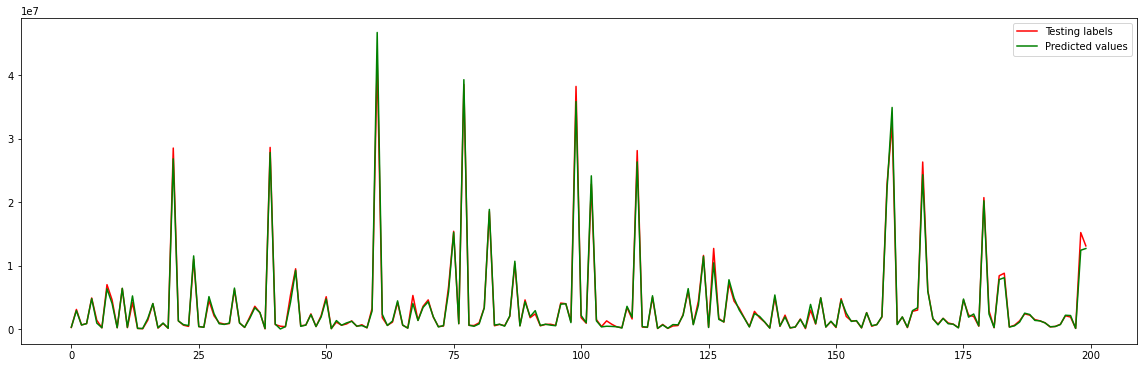

In [91]:
import matplotlib.pyplot as plt

#first_n is the number of dots that appear on graph
first_n = 200
plt.rcParams["figure.figsize"] = (20,6)

plt.plot([i for i in range(len(y_test[:first_n]))], y_test[:first_n], color='r', label='Testing labels')
plt.plot([i for i in range(len(X_test[:first_n]))], reg.predict(X_test[:first_n]), color='g', label='Predicted values')

plt.legend()
plt.show()